In [241]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [242]:
# Importing dataset in csv to pandas data frame.
data = pd.read_csv('/Users/harshini/Desktop/Thinkful/Data/Practice/Life_Expectancy.csv')
df = data
dd = data
all = data

<b>Dataset Description:</b><br/>

<b>Context:</b>
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

<b>Content:</b><br/>
The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.


<b>Inspiration:</b><br/>
The data-set aims to answer the following key questions: 1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy? 2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan? 3. How does Infant and Adult mortality rates affect life expectancy? 4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc. 5. What is the impact of schooling on the lifespan of humans? 6. Does Life Expectancy have positive or negative relationship with drinking alcohol? 7. Do densely populated countries tend to have lower life expectancy? 8. What is the impact of Immunization coverage on life Expectancy?



<b>Data Cleaning and EDA</b>

In [243]:
data.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [244]:
# Pick required countries
data = data.loc[data['Country'].isin(['Tonga','Monaco','Oman','Qatar','Finland','Nepal','India','Mexico','Poland'])]

<b>Univariate distributions.

In [245]:
# Drop rows with Null values.
data = data.dropna(axis=0)

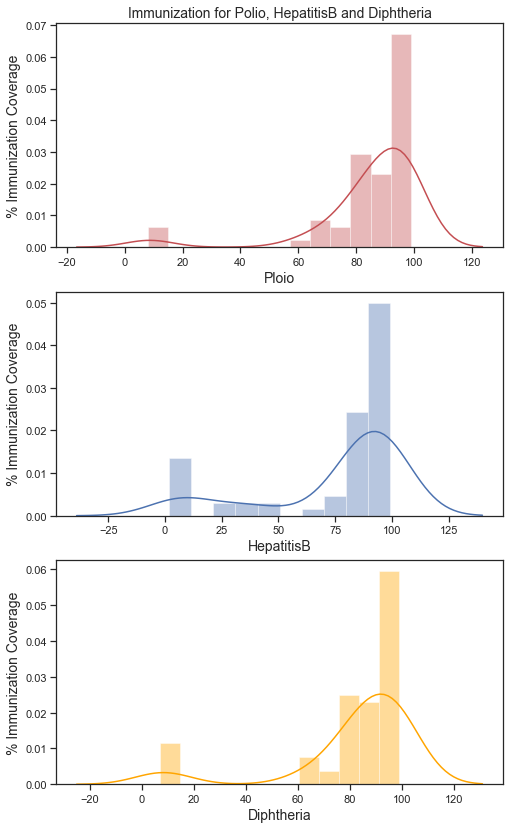

In [246]:
# Distributions of Immunization coverage for Polio, HepatitisB and Diphtheria
plt.figure(figsize=(8,14))
sns.set(style="ticks")

plt.subplot(3,1,1)
p1 = sns.distplot(data['Polio'],color='r')
p1.set_xlabel("Ploio",fontsize=14)
p1.set_ylabel("% Immunization Coverage",fontsize=14)
p1.set_title("Immunization for Polio, HepatitisB and Diphtheria",fontsize=14)

plt.subplot(3,1,2)
p2 = sns.distplot(data['HepatitisB'],color='b')
p2.set_xlabel("HepatitisB",fontsize=14)
p2.set_ylabel("% Immunization Coverage",fontsize=14)

plt.subplot(3,1,3)
p3 = sns.distplot(data['Diphtheria'],color='orange')
p3.set_xlabel("Diphtheria",fontsize=14)
p3.set_ylabel("% Immunization Coverage",fontsize=14)

plt.show()

In [247]:
# Drop rows with Null values from the main data frame.
all.isnull().sum()
all = all.dropna(axis=0)

In [248]:
# Verifying null values
all.isnull().sum()

Country                         0
Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

<b>Feature Visualization

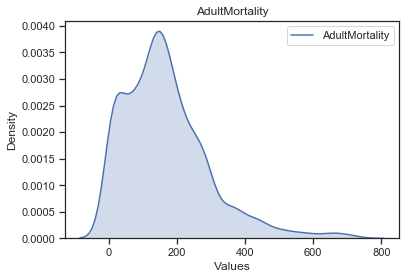

count    1649.000000
mean      168.215282
std       125.310417
min         1.000000
25%        77.000000
50%       148.000000
75%       227.000000
max       723.000000
Name: AdultMortality, dtype: float64


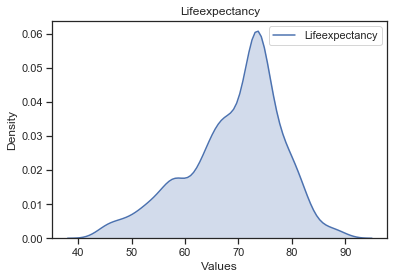

count    1649.000000
mean       69.302304
std         8.796834
min        44.000000
25%        64.400000
50%        71.700000
75%        75.000000
max        89.000000
Name: Lifeexpectancy, dtype: float64


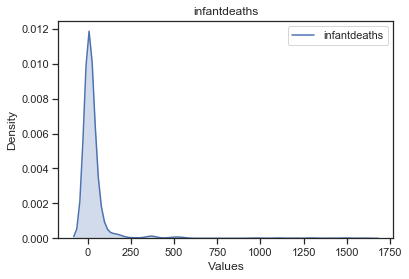

count    1649.000000
mean       32.553062
std       120.847190
min         0.000000
25%         1.000000
50%         3.000000
75%        22.000000
max      1600.000000
Name: infantdeaths, dtype: float64


In [249]:
columns_to_plot = all.columns[3:6].sort_values()
for column in columns_to_plot: 
    sns.kdeplot(all[column], shade=True)
    plt.title(column)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.show()
    print(all[column].describe())

<b>Bivariate relationships

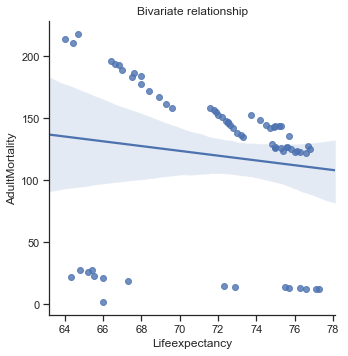

In [250]:
p1 = sns.lmplot(x='Lifeexpectancy',y='AdultMortality',data=data)
plt.title('Bivariate relationship')
plt.show()

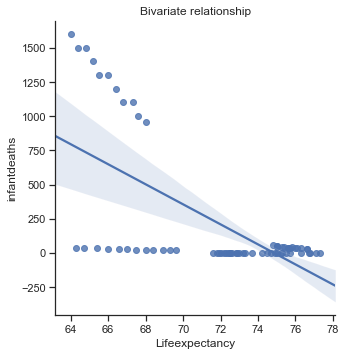

In [251]:
p2 = sns.lmplot(x='Lifeexpectancy',y='infantdeaths',data=data)
plt.title('Bivariate relationship')
plt.show()

<b>Immunization coverage, Lifeexpectancy and AdultMortality across each country.

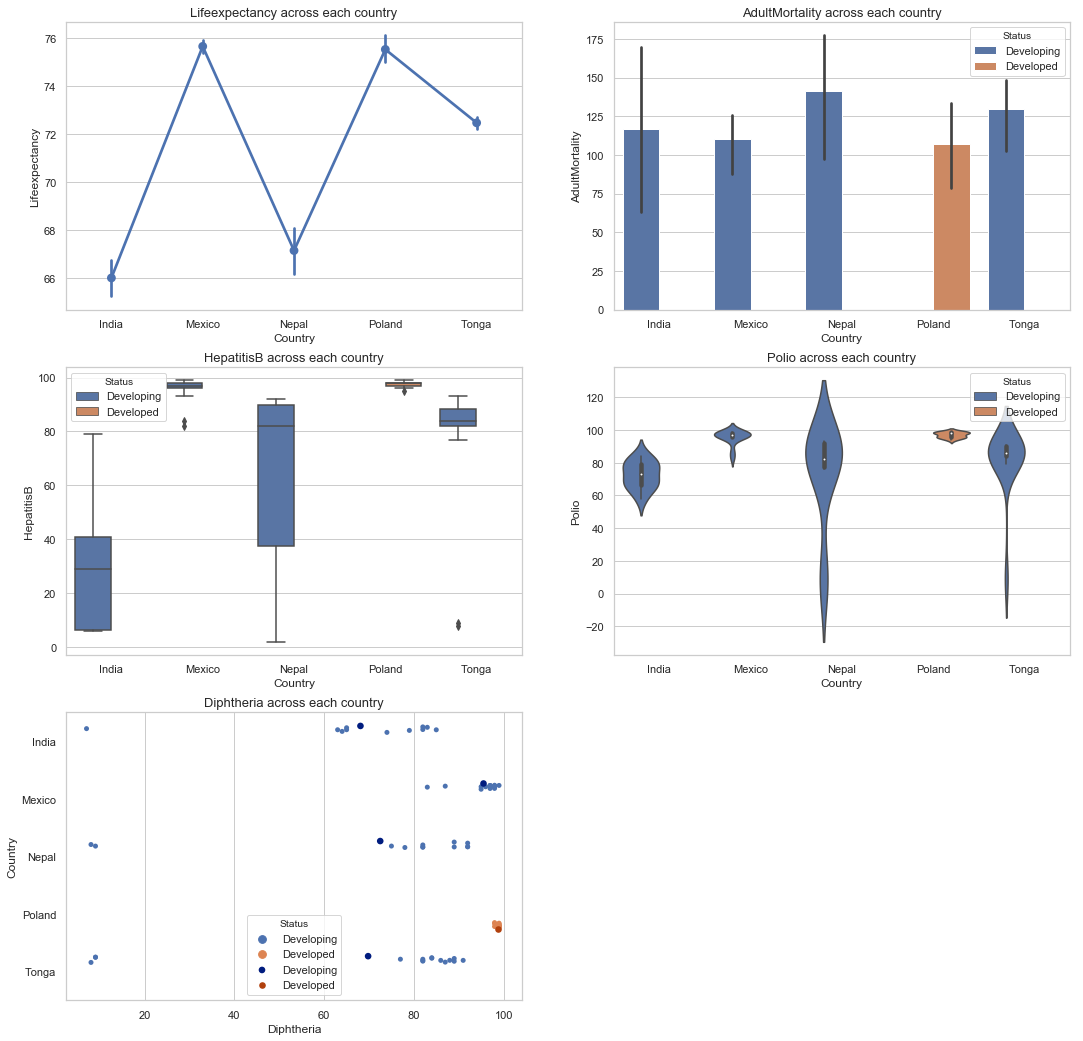

In [252]:
# Immunization coverage, Lifeexpectancy and AdultMortality across each country.
plt.figure(figsize=(18,18))
sns.set(style='whitegrid')

plt.subplot(3,2,1)
plot1 = sns.pointplot(data=data,x=data.Country,y=data['Lifeexpectancy'])
plot1.set_title("Lifeexpectancy across each country",fontsize=13)

plt.subplot(3,2,2)
plot2 = sns.barplot(data=data,x=data.Country,y=data['AdultMortality'],hue='Status')
plot2.set_title("AdultMortality across each country",fontsize=13)

plt.subplot(3,2,3)
plot3 = sns.boxplot(data=data,x=data.Country,y=data['HepatitisB'],hue='Status')
plot3.set_title("HepatitisB across each country",fontsize=13)

plt.subplot(3,2,4)
plot4 = sns.violinplot(data=data,x=data.Country,y=data['Polio'],hue='Status')
plot4.set_title("Polio across each country",fontsize=13)

plt.subplot(3,2,5)
plot5 = sns.stripplot(data=data,y=data.Country,x=data['Diphtheria'],hue='Status',dodge=True,jitter=True,alpha=1,zorder=1)
sns.pointplot(x=data['Diphtheria'],y=data.Country,hue='Status',data=data,dodge=.532,join=False,palette='dark',scale=.75,ci=None)
plot5.set_title("Diphtheria across each country",fontsize=13)

plt.show()

<b>Observation:</b><br/>
- Mexico has highest Lifeexpectancy.<br/>
- Nepal has highest AdultMortality.


In [253]:
final = df[df['Country'].isin(['Norway','Italy','Singapore','Japan','Poland','Palau','Mexico','France'])]
final.dropna(inplace=True)
final.isnull().sum()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Country                         0
Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

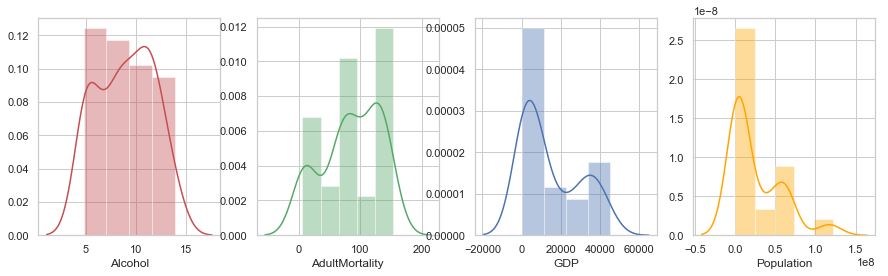

In [254]:
# Using Subplots
dims = (15,4)
fig, axs = plt.subplots(ncols=4,figsize=dims)
sns.distplot(final.Alcohol,ax=axs[0],color='r')
sns.distplot(final.AdultMortality,ax=axs[1],color='g')
sns.distplot(final.GDP,ax=axs[2])
sns.distplot(final.Population,ax=axs[3],color='orange')
plt.show()

In [255]:
dd.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<b>10 countries with lowest percentange of immunization coverage for "HepatitisB"</b>

In [256]:
# Find 10 countries with lowest percentange of immunization coverage for "HepatitisB"
dd = dd.groupby('Country').mean().nsmallest(10,'HepatitisB').reset_index()
dd

,Country,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,MarshallIslands,2013.0,NaN,NaN,0.0000,0.010000,871.878317,8.000000,0.0000,81.60000,...,79.0000,17.240000,79.0000,0.10000,3617.752354,NaN,0.10000,0.10000,NaN,0.00000
1,EquatorialGuinea,2007.5,55.31250,279.3750,3.0000,7.342000,552.671538,9.000000,294.5000,17.85625,...,36.8750,2.929333,29.9375,5.13750,7902.410789,5.567653e+05,6.65625,6.60000,0.536188,8.32500
2,Tuvalu,2013.0,NaN,NaN,0.0000,0.010000,78.281203,9.000000,0.0000,79.30000,...,9.0000,16.610000,9.0000,0.10000,3542.135890,1.819000e+03,0.20000,0.10000,NaN,0.00000
3,Canada,2007.5,81.68750,64.6250,2.0000,8.053333,4694.078971,28.846154,129.5000,55.86250,...,85.3125,7.052000,91.0625,0.10000,29382.907523,1.136405e+07,0.50625,0.43750,0.892188,15.87500
4,Chad,2007.5,50.38750,227.7500,44.8750,0.411333,32.277320,29.875000,4687.7500,16.31875,...,32.8750,4.379333,26.8125,4.33750,484.791694,4.114092e+06,7.14375,7.04375,0.316625,6.08750
5,SouthSudan,2007.5,53.87500,346.3125,27.7500,NaN,8.241077,31.000000,315.7500,NaN,...,44.0000,2.710000,47.0000,3.69375,1092.233631,3.750827e+06,NaN,NaN,0.131688,1.53125
6,India,2007.5,65.41875,146.5625,1366.6875,1.942000,33.242621,35.000000,46454.1875,14.79375,...,69.6250,4.358667,67.0625,0.25625,837.920051,4.214677e+08,27.10000,27.94375,0.549500,9.98125
7,Haiti,2007.5,59.86875,168.3125,17.0000,5.486000,36.129200,40.666667,71.9375,39.27500,...,53.8125,6.183333,48.0000,2.73750,434.360128,3.852658e+06,4.24375,4.25625,0.462062,8.45000
8,Somalia,2007.5,53.31875,316.7500,49.8750,0.010000,0.000000,42.000000,5494.0625,18.68750,...,29.8125,NaN,29.3125,0.83750,297.473345,NaN,7.26875,7.08125,NaN,NaN
9,CentralAfricanRepublic,2007.5,48.51250,333.0625,16.5000,1.231333,40.905543,42.571429,699.4375,17.08750,...,41.3125,4.039333,42.4375,8.98125,363.055905,2.016546e+06,7.10625,7.08750,0.335500,6.23750


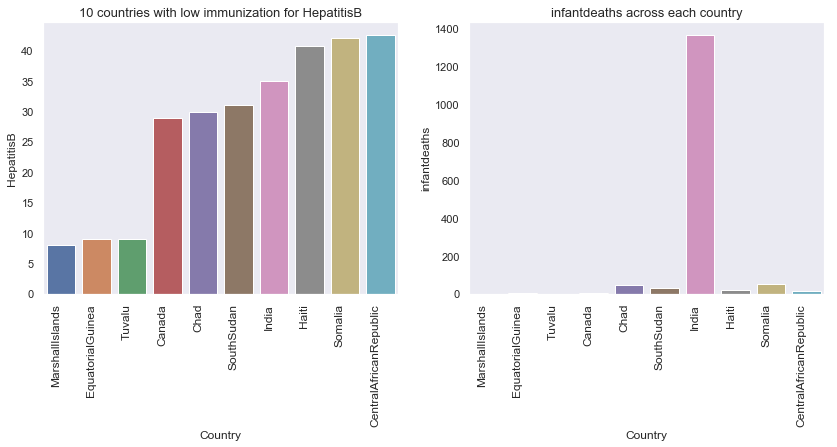

In [257]:
# Visualizing 10 countries with lowest percentange of immunization coverage for "HepatitisB" using barplots.
plt.figure(figsize=(14,5))
sns.set(style='dark')

plt.subplot(1,2,1)
plot1 = sns.barplot(data=dd,x=dd.Country,y=dd['HepatitisB'])
plot1.set_title("10 countries with low immunization for HepatitisB",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.subplot(1,2,2)
plot2 = sns.barplot(data=dd,x=dd.Country,y=dd['infantdeaths'])
plot2.set_title("infantdeaths across each country",fontsize=13)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90, ha="right", fontsize=12)


#ax = plt.scatter(x='HepatitisB',y='infantdeaths',data=data)
plt.show()

<b>Analysis:</b> From the above data and visualization, 'India' is the country with high infantdeaths and low immunization coverage for HepatitisB. Though 'MarshallIslands' is the country with least HepatitisB immunization coverage, the infantdeaths count for it is low(0 in this case). Among the top 10 countries with low immunization coverage to HepatitisB, only India has high infant deathcounts. Hence I've choosen India to conduct the experiment.


<b>Experimental Design</b>

<b>Hypothesis:</b> Increasing HepatitisB immunization coverage among infants would decrease infantdeaths.

<b>Sample:</b>  1000 infants will be randomly selected from the total population with low income. Low income families consent to anonymous data collection and adherence to participation guidelines in exchange for a nominal financial incentive. 

<b>Treatment:</b> The sample will be offered immunization coverage for HepatitisB and are put under observation for 1 year.

<b>Rollout & Evaluation Plan</b><br/>

<b>Impact Window:</b></br>
The first year post-partum.

<b>Data Collection Approach:</b><br/>
Mothers would report either to an assigned site - a nearby public healthcare facility or a preferred alternate (a nearby private non-profit clinic for example) - for all of their infants' incidental and routine healthcare needs throughout the experiment. These sites will already have electronic health record (EHR) systems implemented, to streamline data collection and will abide by Data Use agreements.

<b>Metrics:</b></br>
Number of infant deaths per 1000 population.

<b>Success Criteria:</b></br>
If exclusively immunized infant deaths is atleast 10% less than that of infants without immunization coverage for HepatitisB, the null hypothesis that HepatitisB vaccination has no impact on infant deaths can be rejected.
